## HMMJ  https://www.horizonsetfs.com/horizons/media/pdfs/productsheets/HMMJ-Product-Sheet.pdf

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
!pip install pandas-datareader

from pandas_datareader import data as pdr

!pip install fix-yahoo-finance
import fix_yahoo_finance as yf
!pip install yfinance 
import yfinance as yfnew

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import pandas_datareader.data as web
import datetime
 
  
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

plt.style.use('fivethirtyeight')  
  
  
#start = datetime.datetime(2016,1,1)
start = datetime.datetime(2019,5,1)
end = datetime.date.today()

Populating the interactive namespace from numpy and matplotlib


In [ ]:
ls = ['HMMJ.TO','ogi','hexo','cweb','smg','apha','gwprf','tlry','acb','cron','weed.TO'] # ,'weed'
d = {} 

for i in ls:
  arry= web.DataReader(i, "yahoo", start, end)
  if i == 'HMMJ.TO':
    i = 'HMMJ'
  d[i]= arry["Adj Close"]

stocks = pd.DataFrame(d)

# stocks = pd.DataFrame({
#                       "OGI"  :web.DataReader("OGI", "yahoo", start, end)["Adj Close"],
#                       "AAPL": AAPL["Adj Close"],
#                       "AMZN": AMZN["Adj Close"],
#                       "NFLX": NFLX["Adj Close"],
#                       "GOOG": GOOG["Adj Close"],
#                       "BABA": BABA["Adj Close"],
#                       "BIDU": BIDU["Adj Close"],
#                       "NVDA": NVDA["Adj Close"],
#                       "TSLA": TSLA["Adj Close"],
#                       "TWTR": TWTR["Adj Close"],
   
#                       "FNGU": FNGU["Adj Close"],
    
#                       "MSFT": MSFT["Adj Close"]
# })


# stocks.plot()

In [ ]:
stocks = stocks.fillna(-10000)
stocks=stocks.replace(0,-10000) 
stocks.head(5)

,HMMJ,ogi,hexo,cweb,smg,apha,gwprf,tlry,acb,cron,weed.TO
Date,,,,,,,,,,,
2019-05-01,20.622196,0.001,7.83,30.179153,89.351334,7.47,14.12,51.950001,9.00,17.059999,68.190002
2019-05-02,20.137880,0.001,7.46,30.291788,89.766373,7.13,14.30,50.230000,8.78,16.680000,65.220001
2019-05-03,20.321918,0.001,7.73,31.328428,91.792152,6.94,14.33,50.220001,8.79,16.570000,65.830002
2019-05-06,20.447842,0.001,7.76,29.454502,91.841560,6.89,14.94,49.790001,8.88,16.340000,66.150002
2019-05-07,19.905407,0.001,7.48,27.480900,89.924484,6.67,15.25,47.220001,8.60,15.440000,64.029999


In [ ]:
roi = (stocks.iloc[-1] - stocks.iloc[1])/stocks.iloc[1]
roi = roi*100
roi

HMMJ          -46.419386
ogi        365900.008583
hexo          -68.498661
cweb          -10.767893
smg            16.569263
apha          -28.892004
gwprf         -37.062938
tlry          -53.374477
acb           -56.605922
cron          -48.920861
weed.TO       -56.577738
dtype: float64

In [ ]:
def noStrat():
  df2 = stocks.iloc[0::1] #[1::20] start at 1, every 20th (monthly)
  invPerMonth = 10000 #1000/20
  total = 0
  shares= 0 

  #for i, row in df2.iterrows():

  first = stocks.HMMJ.iloc[0].round(2)
  numShares = math.floor(invPerMonth/first)
  shares+=numShares
  invPerMonth -= (first * numShares)
  invPerMonth += 10000


  return int(stocks.HMMJ.iloc[-1]*shares+invPerMonth)

resultOfNoStrat = noStrat()
#resultOfNoStrat
print(resultOfNoStrat)  # For Python ≥3.7

15242


In [ ]:
dataset = stocks


moneyToInvest = 10000
total=0
shares=0 



for i in dataset.index:
  
  #Close = dataset.loc[i]
  print(Close)
  if(Cci > max):
    #sell
    #numShares = math.floor((moneyToInvest)/row.Close.round(2))
    moneyToInvest += (Close.round(2) * shares)
    shares=0
    

  if(Cci< -min):
    #buy 
    numShares = math.floor((moneyToInvest)/Close.round(2))
    shares+=numShares
    moneyToInvest -= (Close.round(2) * numShares)


CCI_Strat = int(dataset.tail(1).Close*shares+moneyToInvest)
  
increase= 100*round((CCI_Strat-resultOfNoStrat)/resultOfNoStrat,4)
print("   result of CCI_Strat: {}\n   result of no strat:   {}\n   Increase in preformance: {}%".format(CCI_Strat,resultOfNoStrat,increase))

KeyError: ignored

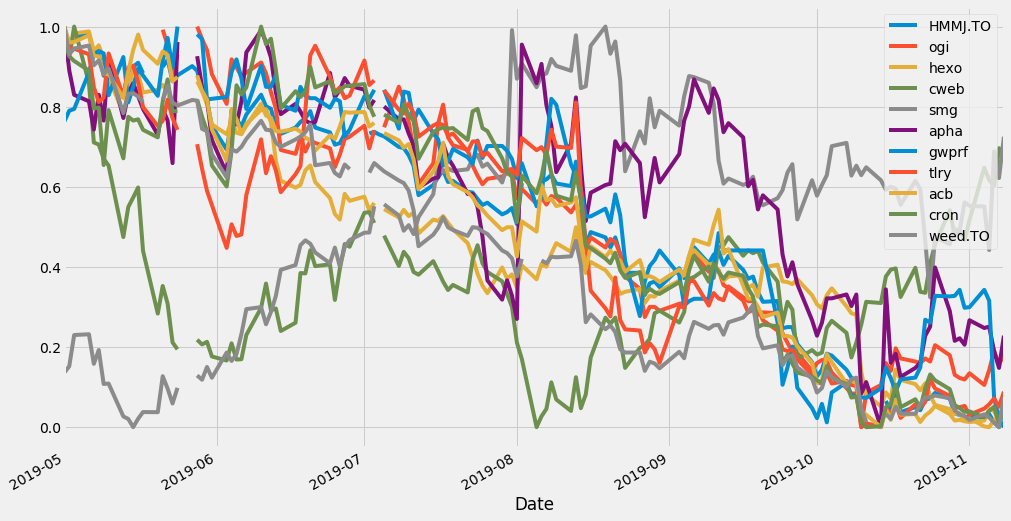

In [ ]:
def normIt(df):
  # mean norm  # normalized_df=(df-df.mean())/df.std()
   return (df-df.min())/(df.max()-df.min()) 


stocks_norm = normIt(stocks)
stocks_norm.plot()

# Other stuff 
selecting most correlated

In [ ]:
corrwith = stocks_norm.corr()
corr_cumSum= corrwith.cumsum()
corr_cumSum

,HMMJ.TO,ogi,hexo,cweb,smg,apha,gwprf,tlry,acb,cron,weed.TO
HMMJ.TO,1.000000,0.963008,0.945338,0.129904,-0.520544,0.867366,0.936648,0.934128,0.993735,0.960354,0.972744
ogi,1.963008,1.963008,1.847315,-0.048092,-0.981184,1.639983,1.881891,1.821963,1.955031,1.914767,1.937532
hexo,2.908347,2.864985,2.847315,0.118136,-1.633778,2.443333,2.708235,2.637502,2.900505,2.766756,2.884477
cweb,3.038251,2.686988,3.013543,1.118136,-2.032620,2.472889,2.813133,2.828858,3.060006,2.870504,3.127991
smg,2.517707,2.226349,2.360949,0.719294,-1.032620,2.156167,2.299889,2.428942,2.515699,2.436650,2.464268
apha,3.385073,2.998965,3.164299,0.748849,-1.349341,3.156167,3.084794,3.200644,3.384468,3.265978,3.247424
gwprf,4.321721,3.944209,3.990643,0.853747,-1.862586,3.941072,4.084794,4.099341,4.310923,4.202961,4.164392
tlry,5.255849,4.832044,4.806183,1.045103,-2.262502,4.712775,4.983491,5.099341,5.234109,5.149501,5.079890
acb,6.249584,5.793340,5.751656,1.204605,-2.806809,5.581543,5.909947,6.022526,6.234109,6.101961,6.046929
cron,7.209938,6.747754,6.603645,1.308353,-3.240664,6.410871,6.846930,6.969067,7.186568,7.101961,6.981938


In [ ]:
keepThese = corr_cumSum.loc[:, corr_cumSum.iloc[-1] > corr_cumSum.iloc[-1].mean()*1.26]
keepThese

,HMMJ.TO,tlry,acb,cron,weed.TO
HMMJ.TO,1.000000,0.934128,0.993735,0.960354,0.972744
ogi,1.963008,1.821963,1.955031,1.914767,1.937532
hexo,2.908347,2.637502,2.900505,2.766756,2.884477
cweb,3.038251,2.828858,3.060006,2.870504,3.127991
smg,2.517707,2.428942,2.515699,2.436650,2.464268
apha,3.385073,3.200644,3.384468,3.265978,3.247424
gwprf,4.321721,4.099341,4.310923,4.202961,4.164392
tlry,5.255849,5.099341,5.234109,5.149501,5.079890
acb,6.249584,6.022526,6.234109,6.101961,6.046929
cron,7.209938,6.969067,7.186568,7.101961,6.981938


In [ ]:
corrwith = corrwith[dropAllButThese]#.cumsum()

dropAllButThese = keepThese.columns.to_list()
dropAllButThese.append("HMMJ.TO")
dropAllButThese=list(set(dropAllButThese))

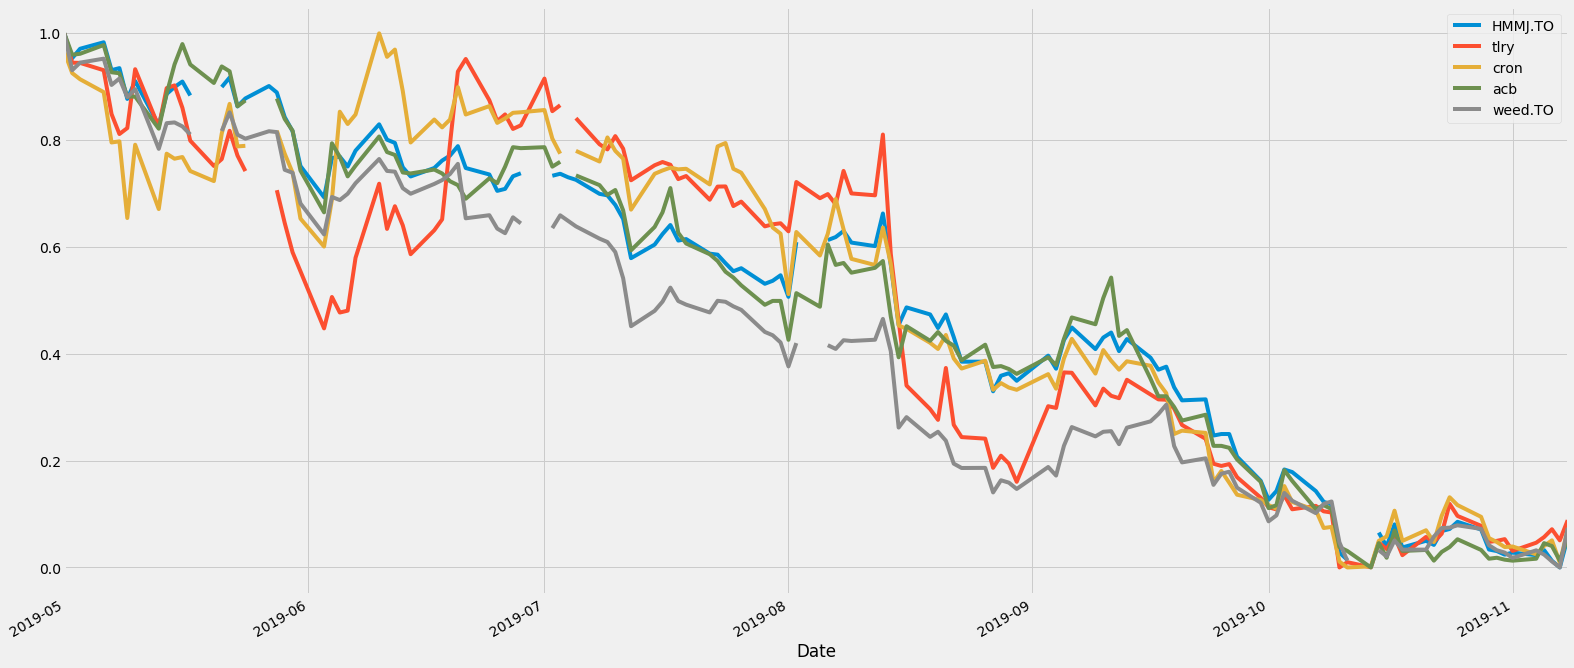

In [ ]:
stocks_main = stocks[dropAllButThese]
stocks_main_norm= normIt(stocks_main)
stocks_main_norm.plot(figsize=(24,12))

# Prediction



In [ ]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
  

model = ARIMA(quickDF["FNGU"], order=(5,1,0))
model_fit = model.fit(disp=0)
#print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())




/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


LinAlgError: ignored

In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

X = quickDF["FNGU"].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test+10)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.5f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# ARIMA to forecast 

In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

X = quickDF["FNGU"].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
#print (history==train) #True 
for t in range(len(test)+10):
    model = ARIMA(history[-1*len(test):], order=(5,1,0)) # changed*
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    try:
      obs = test[t]
    except IndexError:
      obs = yhat
	

    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
 
# error = mean_squared_error(test, predictions)
# print('Test MSE: %.5f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
import numpy as np

#stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change = stocks.apply(lambda x: (x) - (x.shift(1))) # shift moves dates back by 1.
stock_change=stock_change.dropna()
stock_change.head()

In [ ]:
stock_change.plot(grid = True,subplots=True)#.axhline(y = 0, color = "black", lw = 2)

In [ ]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip


In [ ]:
 
from matplotlib.dates import DateFormatter, WeekdayLocator,    DayLocator, MONDAY
from mpl_finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
 
    plt.show()
 
#pandas_candlestick_ohlc(apple)
FNGU = web.DataReader("FNGU", "yahoo", start, end)

FNGU["14d"] = np.round(FNGU["Close"].rolling(window = 20, center = False).mean(), 2)
pandas_candlestick_ohlc(FNGU.loc['2019-01-04':], otherseries = "14d") # FNGU.loc['201-01-04':'2016-08-07',:]

does the PCA of the lesser CORR fetures assist in forcasting an index? 